<a href="https://colab.research.google.com/github/Eric-Chung-0511/Learning-Record/blob/main/Data%20Science%20Projects/Credit%20Score%20Classification/Credit_Score_Classification_Eric_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U imbalanced-learn xgboost lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 3.3 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency c

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit Score Classification/train.csv', low_memory=False)

In [4]:
df.head(20)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [7]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [8]:
# separate categorical data and numeric data
categorical_data = df.select_dtypes(include=['object', 'category']).columns

numerical_data = df.select_dtypes(include=['float64', 'int64']).columns

print(f'Categorical Columns:{list(categorical_data)}')
print(f'Numerical Columns:{list(numerical_data)}')

Categorical Columns:['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score']
Numerical Columns:['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month']


In [9]:
df.select_dtypes(include=['object', 'category']).describe().T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [10]:
df.select_dtypes(include=['float64', 'int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


## Data Preprocessing

* **Exploring Data Analysis**
* **Dealing with Missing Value**

In [11]:
# seems ID, Custimer_ID, Name, SSN are useless for analysis, so dtop them first
df.drop(['ID', 'Customer_ID', 'Name', 'SSN', 'Month','Type_of_Loan'], axis=1, inplace=True)

### Age

In [12]:
# Theres Age -500 which is not possible, so just choose 0~120
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [13]:
df = df[(df['Age'] > 0) & (df['Age'] < 120)]

In [14]:
df['Age'].isna().sum()

0

### Credit_History_Age

In [15]:
df['Credit_History_Age'].isna().sum()

8341

In [16]:
mode_by_credit_mix = df.groupby('Credit_Mix')['Credit_History_Age'].transform(lambda x: x.mode()[0] if not x.mode().empty else x.median())

df['Credit_History_Age'].fillna(mode_by_credit_mix, inplace=True)

In [17]:
df['Credit_History_Age'].isna().sum()

0

In [18]:
df['Credit_History_Age'].value_counts()

Credit_History_Age
19 Years and 5 Months     3476
30 Years and 2 Months     2274
15 Years and 9 Months     2092
13 Years and 8 Months     1822
15 Years and 11 Months     417
                          ... 
0 Years and 3 Months        17
0 Years and 2 Months        14
33 Years and 7 Months       13
33 Years and 8 Months       12
0 Years and 1 Months         1
Name: count, Length: 404, dtype: int64

In [19]:
df['Credit_History_Years'] = df['Credit_History_Age'].str.extract(r'(\d+) Years').astype(int)
df['Credit_History_Months'] = df['Credit_History_Age'].str.extract(r'(\d+) Months').astype(int)

df.drop(columns=['Credit_History_Age'], inplace=True)

In [20]:
df['Credit_History_Age_Months'] = df['Credit_History_Years']*12 + df['Credit_History_Months']
df.drop(['Credit_History_Years', 'Credit_History_Months'], axis=1, inplace=True)

In [21]:
df['Credit_History_Age_Months'].isna().sum()

0

### Occupation VS Annual_Income VS Monthly_Inhand_Salary

In [22]:
df['Occupation'].isna().sum()

0

In [23]:
df = df[df['Occupation'] != '_______']

In [24]:
occupation_counts = df['Occupation'].value_counts()
occupation_counts

Occupation
Lawyer           6053
Architect        5887
Engineer         5876
Accountant       5816
Mechanic         5805
Scientist        5788
Media_Manager    5769
Teacher          5746
Developer        5721
Entrepreneur     5712
Doctor           5628
Journalist       5591
Manager          5502
Musician         5497
Writer           5437
Name: count, dtype: int64

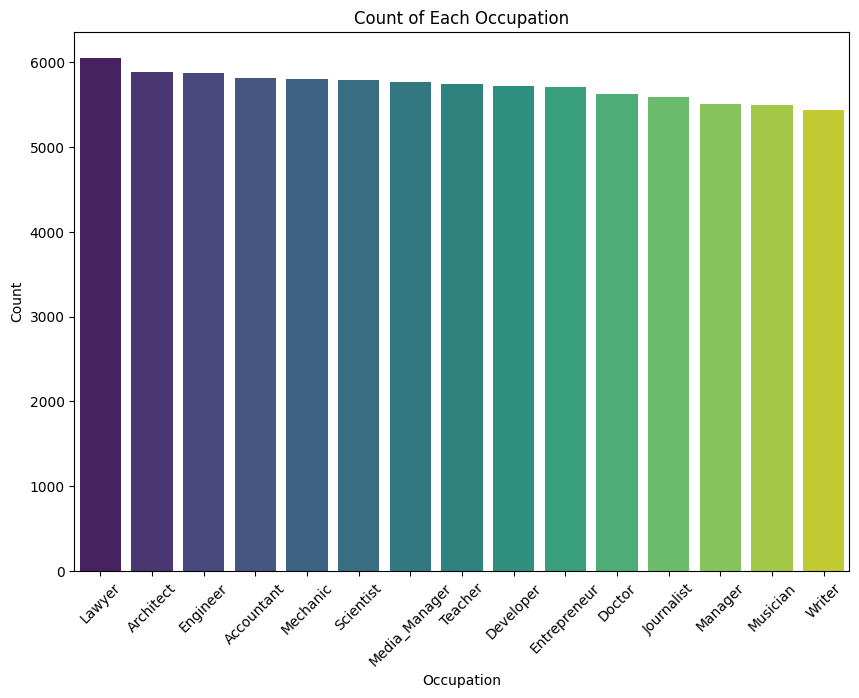

In [25]:
plt.figure(figsize=(10, 7))
sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette='viridis')
plt.title('Count of Each Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Let's base on Occuaption and Annual Income to Calculate Monthly Inhand Salary
df['Occupation_Annual_Income'] = df['Occupation'] + '_' + df['Annual_Income'].astype(str)

median_salary_by_combination = df.groupby('Occupation_Annual_Income')['Monthly_Inhand_Salary'].transform('median')

df['Monthly_Inhand_Salary'].fillna(median_salary_by_combination, inplace=True)

df.drop('Occupation_Annual_Income', axis=1, inplace=True)

df['Monthly_Inhand_Salary'].isna().sum()

737

In [27]:
# The left missing value use occupation's median number to fill in
median_salary_by_occupation = df.groupby('Occupation')['Monthly_Inhand_Salary'].transform('median')
df['Monthly_Inhand_Salary'].fillna(median_salary_by_occupation, inplace=True)
df['Monthly_Inhand_Salary'].isna().sum()

0

### Num_of_Delayed_Payment

In [28]:
df['Num_of_Delayed_Payment'].value_counts().sum()

79830

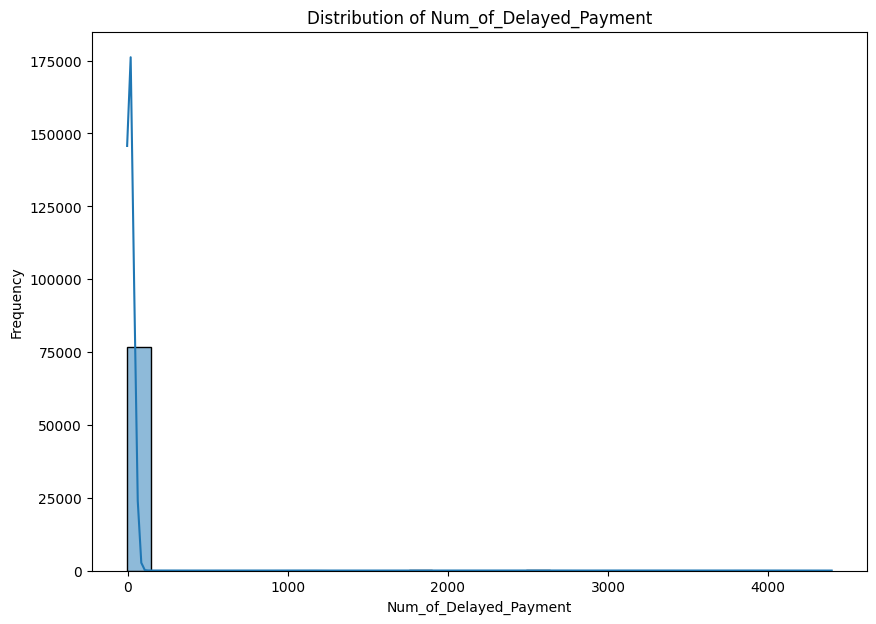

In [29]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

plt.figure(figsize=(10, 7))
sns.histplot(df['Num_of_Delayed_Payment'].dropna(), bins=30, kde=True)
plt.title('Distribution of Num_of_Delayed_Payment')
plt.xlabel('Num_of_Delayed_Payment')
plt.ylabel('Frequency')
plt.show()

In [30]:
mode_deplayed_payment = df['Num_of_Delayed_Payment'].mode()[0]
df['Num_of_Delayed_Payment'].fillna(mode_deplayed_payment, inplace=True)

df['Num_of_Delayed_Payment'].isna().sum()

0

### Num_Credit_Inquiries

In [31]:
df['Num_Credit_Inquiries'].value_counts()

Num_Credit_Inquiries
4.0       9697
3.0       7581
6.0       6971
7.0       6923
2.0       6900
          ... 
267.0        1
1796.0       1
391.0        1
566.0        1
74.0         1
Name: count, Length: 1113, dtype: int64

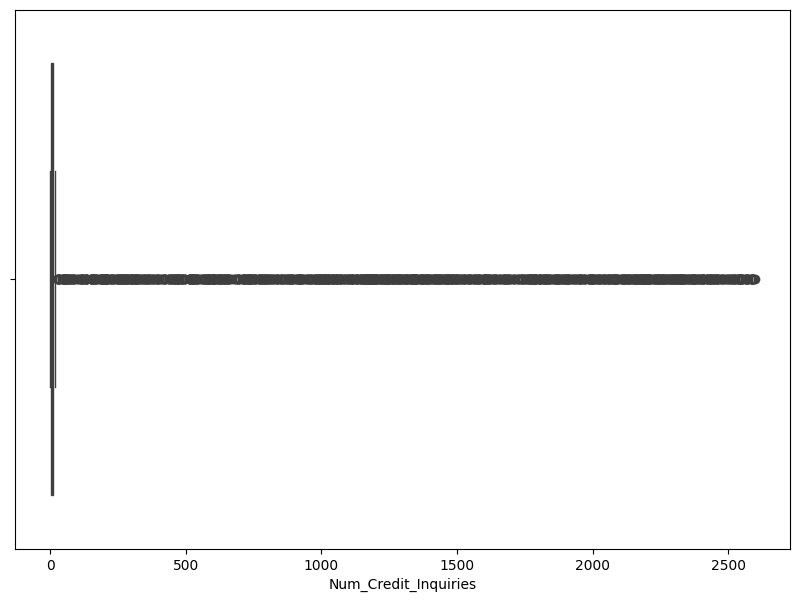

In [32]:
plt.figure(figsize=(10, 7))
sns.boxplot(df, x=df['Num_Credit_Inquiries'].dropna())
plt.show()

In [33]:
median_credit_inquiries = df['Num_Credit_Inquiries'].median()
df['Num_Credit_Inquiries'].fillna(median_credit_inquiries, inplace=True)

df['Num_Credit_Inquiries'].isna().sum()

0

### Amount_invested_monthly

In [34]:
df['Amount_invested_monthly'].value_counts()

Amount_invested_monthly
__10000__             3655
0.0                    134
80.41529543900253        1
323.4872784474037        1
77.29193725012566        1
                      ... 
284.89013911865663       1
279.83979172366315       1
165.9523802198251        1
348.16889956762185       1
167.1638651610451        1
Name: count, Length: 78199, dtype: int64

In [35]:
def extract_numeric_value(val):
    if pd.isna(val):
        return val
    match = re.search(r'\d+', val)
    if match:
        return int(match.group(0))
    return pd.NA

In [36]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].apply(extract_numeric_value)

df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

df['Amount_invested_monthly'].head()

0     80.0
1    118.0
3    199.0
4     41.0
5     62.0
Name: Amount_invested_monthly, dtype: float64

In [37]:
median_amount_invest_m = df['Amount_invested_monthly'].median()
df['Amount_invested_monthly'].fillna(median_amount_invest_m, inplace=True)

df['Amount_invested_monthly'].isna().sum()

0

### Monthly_Balance

In [38]:
df['Monthly_Balance'].value_counts()

Monthly_Balance
__-333333333333333333333333333__    8
230.75180351460182                  1
285.3174756269026                   1
349.68328380757265                  1
236.9265681329008                   1
                                   ..
203.67371266776456                  1
346.4349453393132                   1
237.27390371111068                  1
202.17914950178815                  1
393.6736955618808                   1
Name: count, Length: 84772, dtype: int64

In [39]:
df['Monthly_Balance'] = df['Monthly_Balance'].apply(extract_numeric_value)
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

df['Monthly_Balance'].head()

0    312.0
1    284.0
3    223.0
4    341.0
5    340.0
Name: Monthly_Balance, dtype: float64

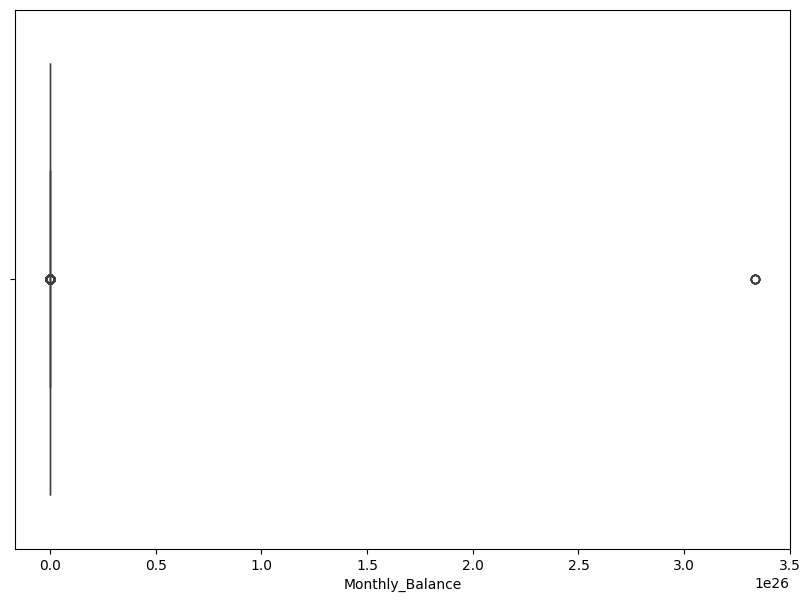

In [40]:
plt.figure(figsize=(10, 7))
sns.boxplot(df, x=df['Monthly_Balance'].dropna())
plt.show()

In [41]:
df['Monthly_Balance'].describe().T

count    8.477900e+04
mean     3.145433e+22
std      3.237887e+24
min      0.000000e+00
25%      2.690000e+02
50%      3.360000e+02
75%      4.700000e+02
max      3.333333e+26
Name: Monthly_Balance, dtype: float64

In [42]:
median_month_balance = df['Monthly_Balance'].median()
df['Monthly_Balance'].fillna(median_month_balance, inplace=True)

df['Monthly_Balance'].isna().sum()

0

In [43]:
df.isna().sum()

Age                          0
Occupation                   0
Annual_Income                0
Monthly_Inhand_Salary        0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
Credit_History_Age_Months    0
dtype: int64

In [44]:
for col in df.columns:
    unique_val = df[col].unique()
    print(f"Column '{col}':")
    print(unique_val[:10])
    print("\n")

Column 'Age':
[23. 28. 34. 54. 55. 21. 31. 33. 30. 24.]


Column 'Occupation':
['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager']


Column 'Annual_Income':
['19114.12' '34847.84' '34847.84_' '143162.64' '30689.89' '30689.89_'
 '35547.71_' '35547.71' '73928.46' '131313.4']


Column 'Monthly_Inhand_Salary':
[ 1824.84333333  3037.98666667 12187.22        2612.49083333
  2853.30916667  5988.705      11242.78333333 10469.20775939
  2611.115       9843.8675    ]


Column 'Num_Bank_Accounts':
[3 2 1 7 4 0 8 5 6 9]


Column 'Num_Credit_Card':
[   4 1385    5 1288    1    7    6  488    8 1381]


Column 'Interest_Rate':
[   3    6    8    4    5 5318   15    7   12   20]


Column 'Num_of_Loan':
['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_']


Column 'Delay_from_due_date':
[ 3 -1  5  6  8  7 13  0  4  9]


Column 'Num_of_Delayed_Payment':
[ 7. 19.  4.  6.  1. -1.  0.  5.  3.  9.]


Column 'Changed_Credit_Limit':
['11.27' '6.

In [45]:
categorical_data = df.select_dtypes(include=['object', 'category']).columns

numerical_data = df.select_dtypes(include=['float64', 'int64']).columns

print(f'Categorical Columns:{list(categorical_data)}')
print('\n')
print(f'Numerical Columns:{list(numerical_data)}')

Categorical Columns:['Occupation', 'Annual_Income', 'Num_of_Loan', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


Numerical Columns:['Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_History_Age_Months']


In [46]:
# Generate data to Machine Learning format, remove some special symbols
def clean_categorical_value(val):
    if pd.isna(val):
        return val
    return re.sub(r'[^a-zA-Z0-9]', '', val)

def clean_numeric_value(val):
    if pd.isna(val):
        return val
    val = str(val)
    clean_val = re.sub(r'[^0-9.]', '', val)
    try:
        return float(clean_val) if '.' in clean_val else int(clean_val)
    except ValueError:
        return pd.NA

In [47]:
categorical_columns = ['Occupation', 'Annual_Income', 'Num_of_Loan', 'Changed_Credit_Limit', 'Credit_Mix',
                       'Outstanding_Debt', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

numeric_columns = ['Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
                   'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
                   'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly','Monthly_Balance']

# clean categorical columns
for column in categorical_columns:
    df[column] = df[column].apply(clean_categorical_value)

# clean numeric columns
for column in numeric_columns:
    df[column] = df[column].apply(clean_numeric_value)
    df[column] = pd.to_numeric(df[column], errors='coerce')

df.head(20)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23.0,Scientist,1911412,1824.843333,3,4,3,4,3,7.0,...,,80998,26.822620,No,49.574949,80.0,HighspentSmallvaluepayments,312.0,Good,265
1,23.0,Scientist,1911412,1824.843333,3,4,3,4,1,19.0,...,Good,80998,31.944960,No,49.574949,118.0,LowspentLargevaluepayments,284.0,Good,362
3,23.0,Scientist,1911412,1824.843333,3,4,3,4,5,4.0,...,Good,80998,31.377862,No,49.574949,199.0,LowspentSmallvaluepayments,223.0,Good,268
4,23.0,Scientist,1911412,1824.843333,3,4,3,4,6,19.0,...,Good,80998,24.797347,No,49.574949,41.0,HighspentMediumvaluepayments,341.0,Good,269
5,23.0,Scientist,1911412,1824.843333,3,4,3,4,8,4.0,...,Good,80998,27.262259,No,49.574949,62.0,98,340.0,Good,270
6,23.0,Scientist,1911412,1824.843333,3,4,3,4,3,19.0,...,Good,80998,22.537593,No,49.574949,178.0,LowspentSmallvaluepayments,244.0,Good,271
7,23.0,Scientist,1911412,1824.843333,3,4,3,4,3,6.0,...,Good,80998,23.933795,No,49.574949,24.0,HighspentMediumvaluepayments,358.0,Standard,362
9,28.0,Teacher,3484784,3037.986667,2,4,6,1,7,1.0,...,Good,60503,38.550848,No,18.816215,40.0,HighspentLargevaluepayments,484.0,Good,320
10,28.0,Teacher,3484784,3037.986667,2,1385,6,1,3,1.0,...,,60503,33.224951,No,18.816215,58.0,HighspentLargevaluepayments,466.0,Standard,321
11,28.0,Teacher,3484784,3037.986667,2,4,6,1,3,19.0,...,Good,60503,39.182656,No,18.816215,99.0,LowspentMediumvaluepayments,465.0,Good,322


In [48]:
categorical_data = df.select_dtypes(include=['object', 'category']).columns

numerical_data = df.select_dtypes(include=['float64', 'int64']).columns

print(f'Categorical Columns:{list(categorical_data)}')
print('\n')
print(f'Numerical Columns:{list(numerical_data)}')

Categorical Columns:['Occupation', 'Annual_Income', 'Num_of_Loan', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


Numerical Columns:['Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_History_Age_Months']


## Encoder

In [49]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    31398
Good        20843
            17336
Bad         16251
Name: count, dtype: int64

In [50]:
df = df[df['Credit_Mix'] != '']
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    31398
Good        20843
Bad         16251
Name: count, dtype: int64

In [51]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
LowspentSmallvaluepayments      17429
HighspentMediumvaluepayments    12081
LowspentMediumvaluepayments      9526
HighspentLargevaluepayments      9407
HighspentSmallvaluepayments      7716
LowspentLargevaluepayments       7104
98                               5229
Name: count, dtype: int64

In [52]:
df = df[df['Payment_Behaviour'] != '98']
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
LowspentSmallvaluepayments      17429
HighspentMediumvaluepayments    12081
LowspentMediumvaluepayments      9526
HighspentLargevaluepayments      9407
HighspentSmallvaluepayments      7716
LowspentLargevaluepayments       7104
Name: count, dtype: int64

In [53]:
df.reset_index(drop=True, inplace=True)

len(df)

63263

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63263 entries, 0 to 63262
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        63263 non-null  float64
 1   Occupation                 63263 non-null  object 
 2   Annual_Income              63263 non-null  object 
 3   Monthly_Inhand_Salary      63263 non-null  float64
 4   Num_Bank_Accounts          63263 non-null  int64  
 5   Num_Credit_Card            63263 non-null  int64  
 6   Interest_Rate              63263 non-null  int64  
 7   Num_of_Loan                63263 non-null  object 
 8   Delay_from_due_date        63263 non-null  int64  
 9   Num_of_Delayed_Payment     63263 non-null  float64
 10  Changed_Credit_Limit       63263 non-null  object 
 11  Num_Credit_Inquiries       63263 non-null  float64
 12  Credit_Mix                 63263 non-null  object 
 13  Outstanding_Debt           63263 non-null  obj

In [55]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    33714
Poor        18353
Good        11196
Name: count, dtype: int64

In [56]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    33070
No     22548
NM      7645
Name: count, dtype: int64

In [57]:
df.isna().sum()

Age                          0
Occupation                   0
Annual_Income                0
Monthly_Inhand_Salary        0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
Credit_History_Age_Months    0
dtype: int64

In [58]:
# In order to use model training, need to transform the format
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [59]:
ordinal_encoder = OrdinalEncoder()
label_encoder = LabelEncoder()

# Ordinal Encoder
df['Payment_Behaviour_Encoded'] = ordinal_encoder.fit_transform(df[['Payment_Behaviour']])
df['Credit_Mix_Encoded'] = ordinal_encoder.fit_transform(df[['Credit_Mix']])

# Label Encoder
df['Occupation_Encoded'] = label_encoder.fit_transform(df['Occupation'])
df['Payment_of_Min_Amount_Encoded'] = label_encoder.fit_transform(df['Payment_of_Min_Amount'])
df['Credit_Score_Encoded'] = label_encoder.fit_transform(df['Credit_Score'])

# Drop original Column
drop_columns = ['Payment_Behaviour', 'Credit_Mix', 'Payment_of_Min_Amount', 'Occupation', 'Credit_Score']
df.drop(drop_columns, axis=1, inplace=True)

df.head(10)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months,Payment_Behaviour_Encoded,Credit_Mix_Encoded,Occupation_Encoded,Payment_of_Min_Amount_Encoded,Credit_Score_Encoded
0,23.0,1911412,1824.843333,3,4,3,4,1,19.0,1127,...,31.944960,49.574949,118.0,284.0,362,3.0,1.0,12,1,0
1,23.0,1911412,1824.843333,3,4,3,4,5,4.0,627,...,31.377862,49.574949,199.0,223.0,268,5.0,1.0,12,1,0
2,23.0,1911412,1824.843333,3,4,3,4,6,19.0,1127,...,24.797347,49.574949,41.0,341.0,269,1.0,1.0,12,1,0
3,23.0,1911412,1824.843333,3,4,3,4,3,19.0,1127,...,22.537593,49.574949,178.0,244.0,271,5.0,1.0,12,1,0
4,23.0,1911412,1824.843333,3,4,3,4,3,6.0,1127,...,23.933795,49.574949,24.0,358.0,362,1.0,1.0,12,1,2
5,28.0,3484784,3037.986667,2,4,6,1,7,1.0,742,...,38.550848,18.816215,40.0,484.0,320,0.0,1.0,13,1,0
6,28.0,3484784,3037.986667,2,4,6,1,3,19.0,542,...,39.182656,18.816215,99.0,465.0,322,4.0,1.0,13,1,0
7,28.0,3484784,3037.986667,2,4,6,1,3,1.0,642,...,34.977895,18.816215,130.0,444.0,323,5.0,1.0,13,1,0
8,28.0,3484784,3037.986667,2,4,6,1,3,0.0,542,...,33.381010,18.816215,43.0,481.0,324,0.0,1.0,13,1,0
9,28.0,3484784,3037.986667,2,4,6,1,3,4.0,542,...,31.131702,18.816215,70.0,464.0,325,1.0,1.0,13,0,0


In [60]:
ordinal_mapping = {i: category for i, category in enumerate(ordinal_encoder.categories_[0])}
print("OrdinalEncoder mapping:", ordinal_mapping)

OrdinalEncoder mapping: {0: 'Bad', 1: 'Good', 2: 'Standard'}


In [61]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("LabelEncoder mapping:", label_mapping)

LabelEncoder mapping: {'Good': 0, 'Poor': 1, 'Standard': 2}


In [62]:
categorical_data = df.select_dtypes(include=['object', 'category']).columns

numerical_data = df.select_dtypes(include=['float64', 'int64']).columns

print(f'Categorical Columns:{list(categorical_data)}')
print('\n')
print(f'Numerical Columns:{list(numerical_data)}')

Categorical Columns:['Annual_Income', 'Num_of_Loan', 'Changed_Credit_Limit', 'Outstanding_Debt']


Numerical Columns:['Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_History_Age_Months', 'Payment_Behaviour_Encoded', 'Credit_Mix_Encoded', 'Occupation_Encoded', 'Payment_of_Min_Amount_Encoded', 'Credit_Score_Encoded']


In [63]:
# Turn all to numerical data
object_columns = ['Annual_Income', 'Num_of_Loan', 'Changed_Credit_Limit', 'Outstanding_Debt']
for column in object_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

categorical_data = df.select_dtypes(include=['object', 'category']).columns

numerical_data = df.select_dtypes(include=['float64', 'int64']).columns

print(f'Categorical Columns:{list(categorical_data)}')
print('\n')
print(f'Numerical Columns:{list(numerical_data)}')

Categorical Columns:[]


Numerical Columns:['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_History_Age_Months', 'Payment_Behaviour_Encoded', 'Credit_Mix_Encoded', 'Occupation_Encoded', 'Payment_of_Min_Amount_Encoded', 'Credit_Score_Encoded']


In [64]:
selected_columns = ['Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Bank_Accounts']

for column in selected_columns:
    df = df[df[column] >= 0]

In [65]:
# Calculate the total number of accounts (Bank Accounts + Credit Cards)
df['Total_Num_Accounts'] = df['Num_Bank_Accounts'] + df['Num_Credit_Card']

# Calculate the total outstanding debt per account
df['Debt_Per_Account'] = df['Outstanding_Debt'] / df['Total_Num_Accounts']

# Calculate the ratio of outstanding debt to annual income
df['Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Annual_Income']

# Calculate the total number of delayed payments per account
df['Delayed_Payments_Per_Account'] = df['Num_of_Delayed_Payment'] / df['Total_Num_Accounts']

# Calculate the total monthly expenses (EMI + Monthly Investments)
df['Total_Monthly_Expenses'] = df['Total_EMI_per_month'] + df['Amount_invested_monthly']

In [66]:
df.isna().sum()

Age                              0
Annual_Income                    0
Monthly_Inhand_Salary            0
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Delay_from_due_date              0
Num_of_Delayed_Payment           0
Changed_Credit_Limit             0
Num_Credit_Inquiries             0
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Total_EMI_per_month              0
Amount_invested_monthly          0
Monthly_Balance                  0
Credit_History_Age_Months        0
Payment_Behaviour_Encoded        0
Credit_Mix_Encoded               0
Occupation_Encoded               0
Payment_of_Min_Amount_Encoded    0
Credit_Score_Encoded             0
Total_Num_Accounts               0
Debt_Per_Account                 0
Debt_to_Income_Ratio             0
Delayed_Payments_Per_Account     0
Total_Monthly_Expenses           0
dtype: int64

Credit_Mix_Encoded               0.230191
Payment_of_Min_Amount_Encoded    0.177152
Delay_from_due_date              0.094503
Outstanding_Debt                 0.032329
Payment_Behaviour_Encoded        0.017842
Debt_to_Income_Ratio             0.014690
Num_of_Delayed_Payment           0.010176
Num_Bank_Accounts                0.007611
Occupation_Encoded               0.006517
Annual_Income                    0.003564
Total_Num_Accounts               0.003473
Num_Credit_Inquiries             0.003329
Changed_Credit_Limit             0.003293
Num_of_Loan                      0.001732
Interest_Rate                   -0.000044
Total_EMI_per_month             -0.001958
Num_Credit_Card                 -0.002284
Delayed_Payments_Per_Account    -0.003478
Total_Monthly_Expenses          -0.004481
Amount_invested_monthly         -0.010912
Credit_Utilization_Ratio        -0.018991
Monthly_Balance                 -0.053618
Age                             -0.059388
Monthly_Inhand_Salary           -0

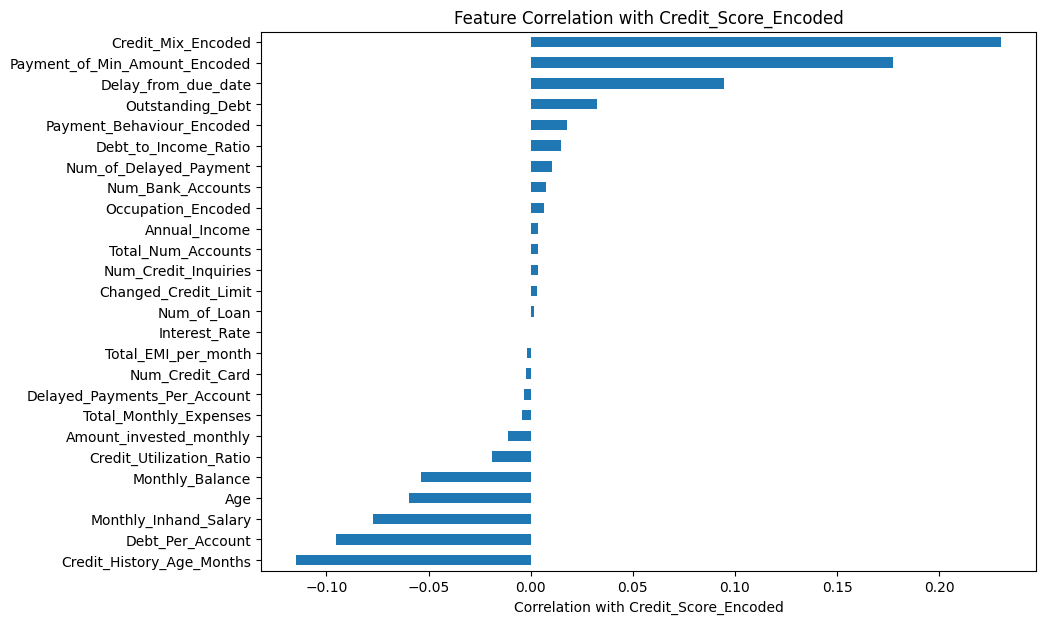

In [67]:
corr_matrix = df.corr()
corr_target = corr_matrix['Credit_Score_Encoded'].drop('Credit_Score_Encoded')
print(corr_target.sort_values(ascending=False))

plt.figure(figsize=(10, 7))
corr_target.sort_values().plot.barh()
plt.xlabel('Correlation with Credit_Score_Encoded')
plt.title('Feature Correlation with Credit_Score_Encoded')
plt.show()

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_X = df.drop(['Credit_Score_Encoded'], axis=1)
vif_data = calculate_vif(vif_X)
print(vif_data)

                          feature           VIF
0                             Age  9.419751e-01
1                   Annual_Income  1.016681e+00
2           Monthly_Inhand_Salary  1.944349e+00
3               Num_Bank_Accounts  8.200435e+08
4                 Num_Credit_Card  3.275311e+09
5                   Interest_Rate  9.998922e-01
6                     Num_of_Loan  1.000074e+00
7             Delay_from_due_date  1.450008e+00
8          Num_of_Delayed_Payment  2.435241e+00
9            Changed_Credit_Limit  1.000902e+00
10           Num_Credit_Inquiries  1.000094e+00
11               Outstanding_Debt  3.067922e+00
12       Credit_Utilization_Ratio  4.937596e-01
13            Total_EMI_per_month  1.890720e+10
14        Amount_invested_monthly  2.202465e+11
15                Monthly_Balance  2.049900e+00
16      Credit_History_Age_Months  1.458514e+00
17      Payment_Behaviour_Encoded  1.277063e+00
18             Credit_Mix_Encoded  1.277108e+00
19             Occupation_Encoded  9.644

In [69]:
features_to_drop = [
    'Age', 'Num_Credit_Card', 'Interest_Rate', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Occupation_Encoded',
    'Total_Num_Accounts', 'Total_Monthly_Expenses', 'Debt_to_Income_Ratio','Monthly_Balance','Payment_Behaviour_Encoded',
    'Num_Bank_Accounts', 'Changed_Credit_Limit', 'Amount_invested_monthly', 'Num_of_Loan']

df_filtered = df.drop(features_to_drop, axis=1)

In [70]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61940 entries, 0 to 63262
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Annual_Income                  61940 non-null  int64  
 1   Monthly_Inhand_Salary          61940 non-null  float64
 2   Delay_from_due_date            61940 non-null  int64  
 3   Num_of_Delayed_Payment         61940 non-null  float64
 4   Num_Credit_Inquiries           61940 non-null  float64
 5   Outstanding_Debt               61940 non-null  int64  
 6   Credit_History_Age_Months      61940 non-null  int64  
 7   Credit_Mix_Encoded             61940 non-null  float64
 8   Payment_of_Min_Amount_Encoded  61940 non-null  int64  
 9   Credit_Score_Encoded           61940 non-null  int64  
 10  Debt_Per_Account               61940 non-null  float64
 11  Delayed_Payments_Per_Account   61940 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 6.1 MB


In [71]:
df_filtered.shape

(61940, 12)

## Removing Outliers

In [72]:
# remove the smallest 1% and biggest 1%
def remove_outliers(df, columns, lower_quantile=0.1, upper_quantile=0.9):

    for column in columns:

        # the smallest 1%
        lower_bound = df[column].quantile(lower_quantile)

        # the biggest 1%
        upper_bound = df[column].quantile(upper_quantile)

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

In [73]:
columns_to_check_outliers = ['Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
                             'Outstanding_Debt', 'Debt_Per_Account', 'Delayed_Payments_Per_Account', 'Credit_History_Age_Months']

df_outliers_filtered = remove_outliers(df_filtered, columns_to_check_outliers, lower_quantile=0.1, upper_quantile=0.9)

df_outliers_filtered.shape

(9540, 12)

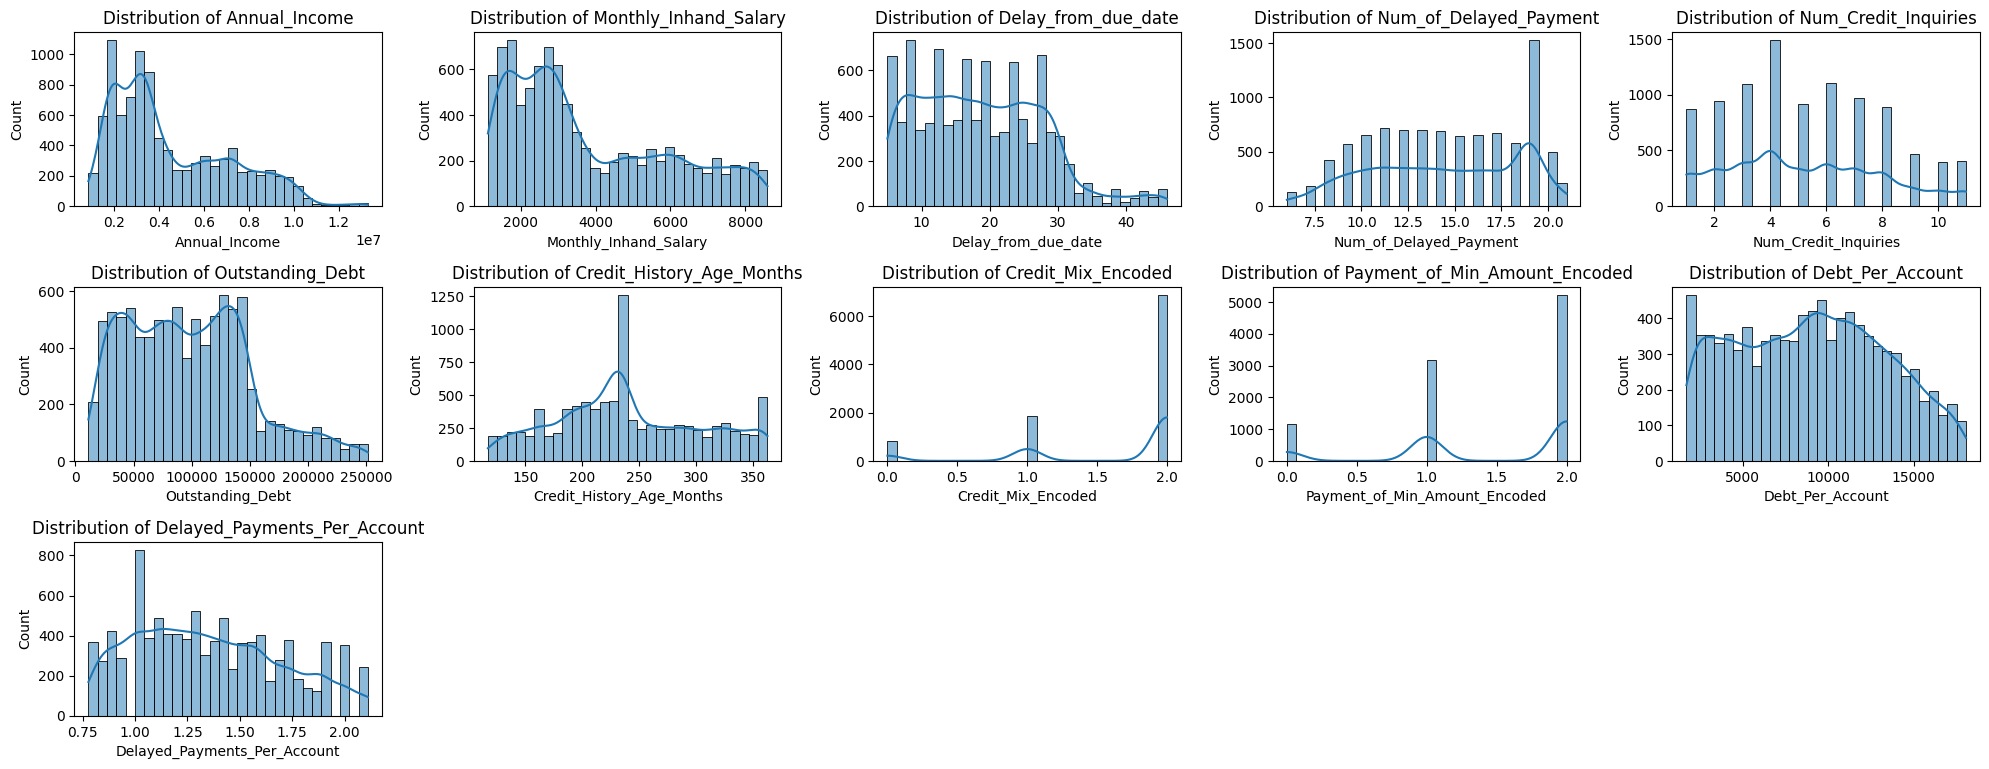

In [74]:
features_to_plot = df_outliers_filtered.drop('Credit_Score_Encoded', axis=1).columns
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_to_plot):
    plt.subplot(6, 5, i + 1)
    sns.histplot(df_outliers_filtered[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

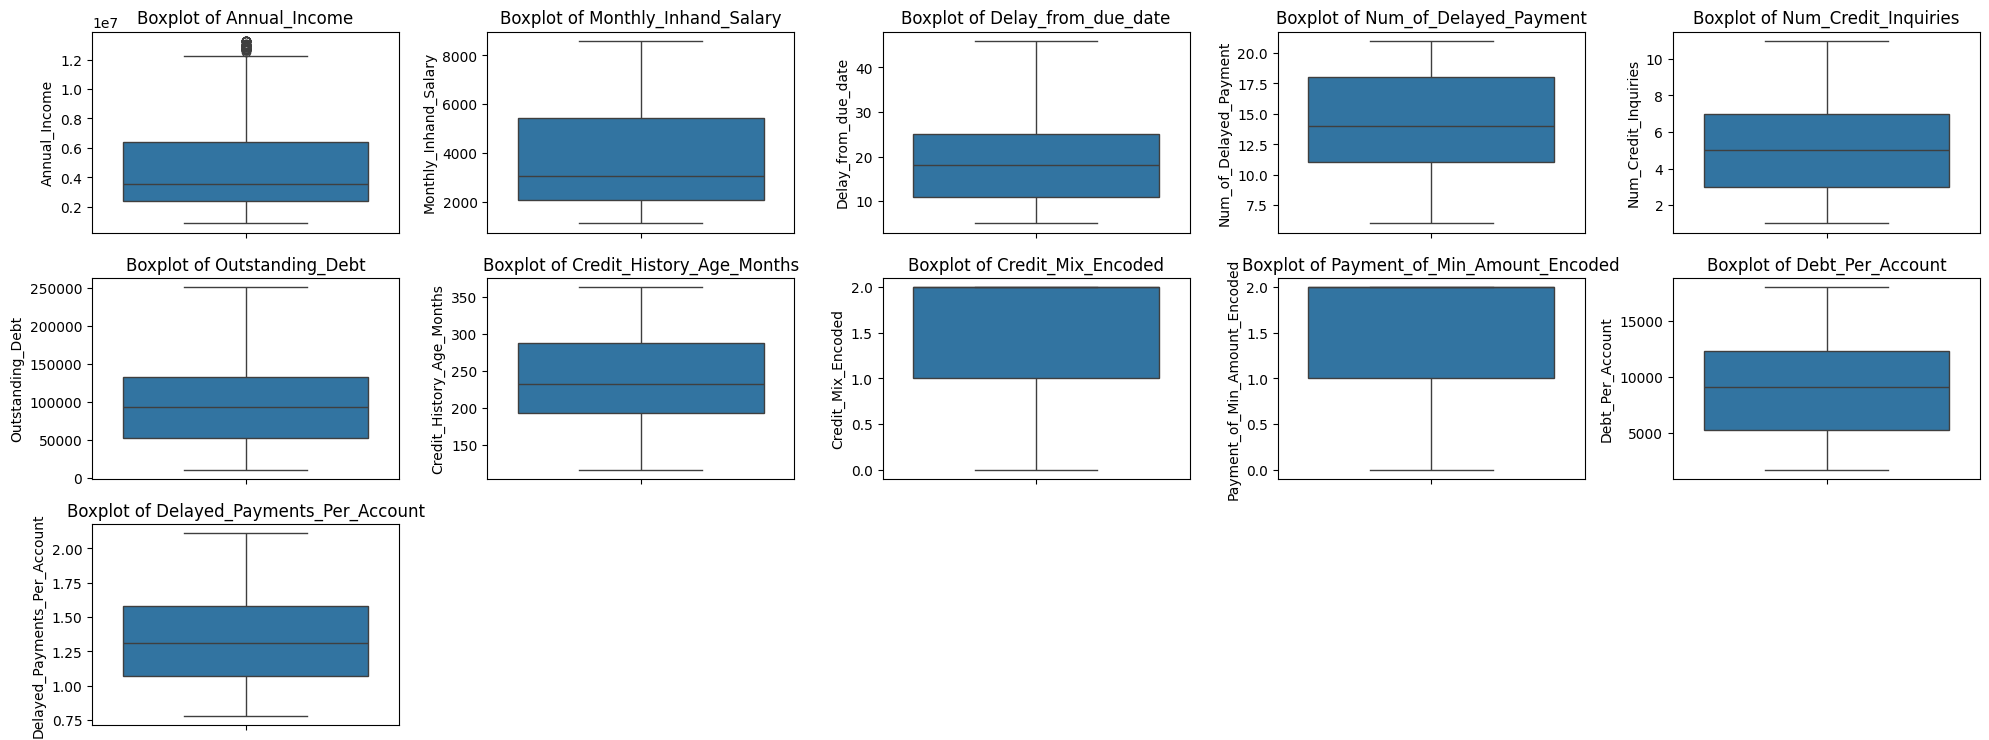

In [75]:
features_to_plot = df_outliers_filtered.drop('Credit_Score_Encoded', axis=1).columns
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_to_plot):
    plt.subplot(6, 5, i + 1)
    sns.boxplot(y=df_outliers_filtered[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [76]:
df_outliers_filtered.isna().sum()

Annual_Income                    0
Monthly_Inhand_Salary            0
Delay_from_due_date              0
Num_of_Delayed_Payment           0
Num_Credit_Inquiries             0
Outstanding_Debt                 0
Credit_History_Age_Months        0
Credit_Mix_Encoded               0
Payment_of_Min_Amount_Encoded    0
Credit_Score_Encoded             0
Debt_Per_Account                 0
Delayed_Payments_Per_Account     0
dtype: int64

## Model Building Preprocessing

In [77]:
X = df_outliers_filtered.drop('Credit_Score_Encoded', axis=1)
y = df_outliers_filtered['Credit_Score_Encoded']

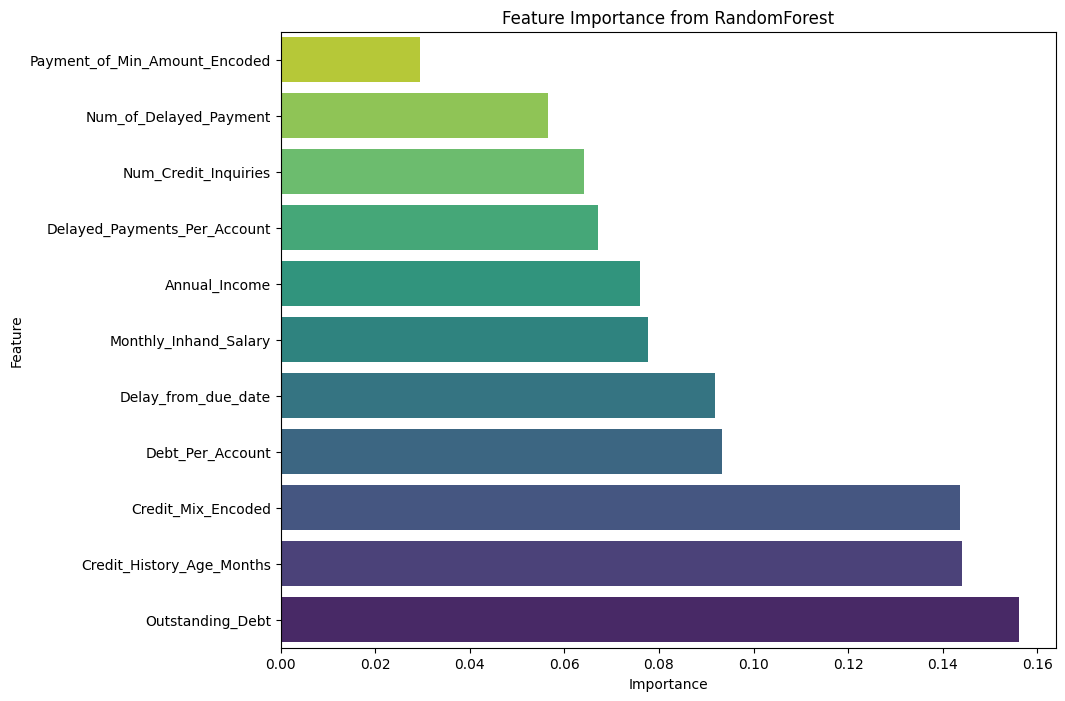

                          Feature  Importance
5                Outstanding_Debt    0.156088
6       Credit_History_Age_Months    0.144013
7              Credit_Mix_Encoded    0.143614
9                Debt_Per_Account    0.093317
2             Delay_from_due_date    0.091875
1           Monthly_Inhand_Salary    0.077594
0                   Annual_Income    0.076051
10   Delayed_Payments_Per_Account    0.067188
4            Num_Credit_Inquiries    0.064084
3          Num_of_Delayed_Payment    0.056631
8   Payment_of_Min_Amount_Encoded    0.029545


In [78]:
from sklearn.ensemble import RandomForestClassifier

# Use RandomForest for training
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

# get the importance
feature_importances = rf_classifier.feature_importances_

# turn to DataFrame
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances})

# sort importance in order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from RandomForest')
plt.gca().invert_yaxis()
plt.show()

print(importance_df)

Class Counts:
 Credit_Score_Encoded
2    6251
1    1988
0    1301
Name: count, dtype: int64
Class Ratio:
 Credit_Score_Encoded
2    0.655241
1    0.208386
0    0.136373
Name: count, dtype: float64


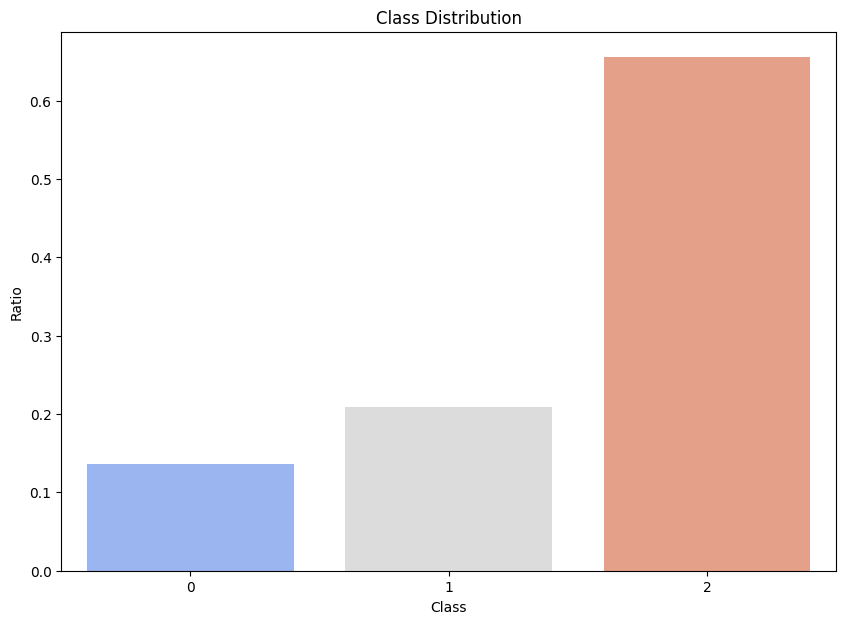

In [79]:
# calculate numbers
class_counts = y.value_counts()
print('Class Counts:\n', class_counts)

# calcualte ratio
class_ratio = class_counts / len(y)
print('Class Ratio:\n', class_ratio)

plt.figure(figsize=(10, 7))
sns.barplot(x=class_ratio.index, y=class_ratio.values, palette='coolwarm')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Ratio')
plt.show()

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

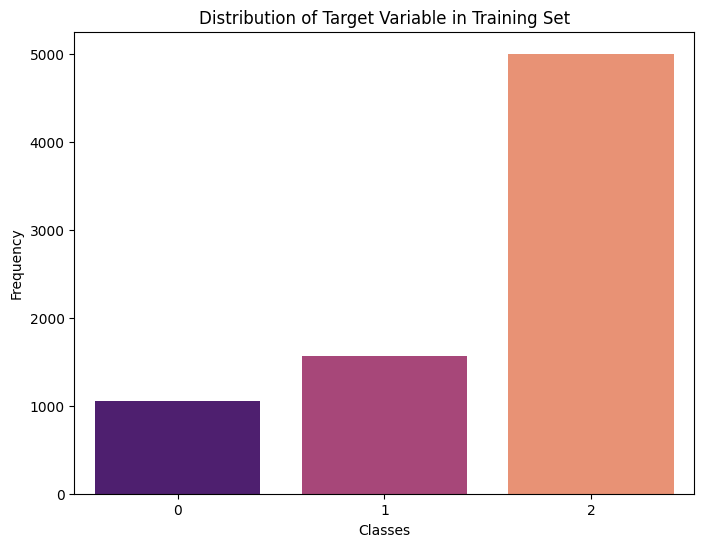

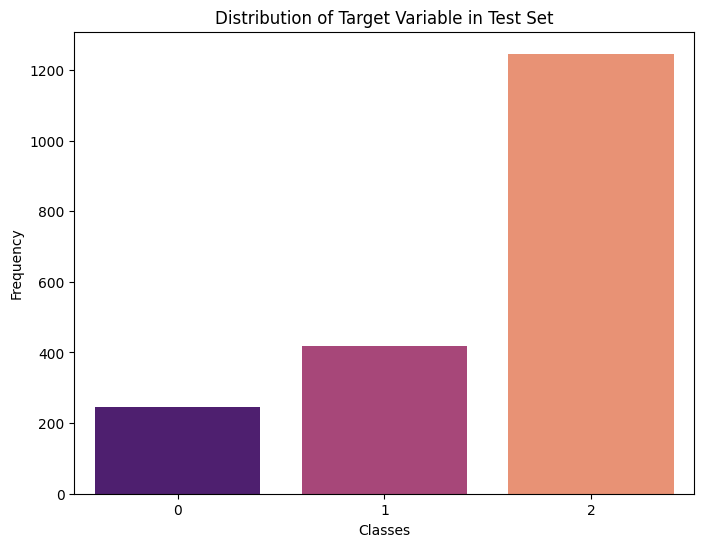

In [82]:
plt.figure(figsize=(8, 6))
sns.barplot(x=y_train.value_counts().index, y=y_train.value_counts().values, palette='magma')
plt.title('Distribution of Target Variable in Training Set')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=y_test.value_counts().index, y=y_test.value_counts().values, palette='magma')
plt.title('Distribution of Target Variable in Test Set')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [83]:
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [84]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [85]:
#pca = PCA(n_components=0.95)

#X_train_pca = pca.fit_transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)

#explained_variance = pca.explained_variance_ratio_
#print("Every PCA explained varience ratio:")
#print(explained_variance)

# plot Explained Varience
#plt.figure(figsize=(8, 6))
#plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
#plt.title('Explained Variance by Principal Components')
#plt.xlabel('Number of Principal Components')
#plt.ylabel('Explained Variance Ratio')
#plt.show()

# 檢查分割後數據的形狀
#print("train_shape:", X_train_pca.shape)
#print("test_shape:", X_test_pca.shape)

## Model Building

In [86]:
!pip install bayesian-optimization

In [87]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score, GridSearchCV
from bayes_opt import BayesianOptimization
from sklearn.metrics import accuracy_score, f1_score, classification_report, log_loss,  precision_recall_fscore_support
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

## Define Calculate Result Function

In [88]:
def calculate_results(y_true, y_pred):

    # Calculate model accuracy
    model_accuracy = accuracy_score(y_true, y_pred)

    # Calculate model precision, recall, and F1 score, '_' stands for support
    model_precision, model_recall, model_f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

    # Round accuracy to two decimal places
    model_accuracy = round(model_accuracy * 100, 2)

    # Round precision to two decimal places and convert to percentage
    model_precision = round(model_precision * 100, 2)

    # Round recall to two decimal places and convert to percentage
    model_recall = round(model_recall * 100, 2)

    # Round F1 score to two decimal places and convert to percentage
    model_f1_score = round(model_f1_score * 100, 2)

    # Store the results in a dictionary with percentage format
    model_results = {
        'accuracy': f'{model_accuracy}%',
        'precision': f'{model_precision}%',
        'recall': f'{model_recall}%',
        'f1_score': f'{model_f1_score}%'}

    return model_results

## Define Plot ROC Cureve Function

In [89]:
def plot_roc_curve_multiclass(model, X_test, y_test, n_classes=3):

    # Get the predicted probabilities for each class
    y_pred_proba = model.predict_proba(X_test)

    # Compute the log loss
    logloss = log_loss(y_test, y_pred_proba)
    print("Log Loss:", logloss)

    # Initialize dictionaries to store false positive rates, true positive rates, and ROC AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Compute ROC curve and ROC AUC for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curve
    plt.figure(figsize=(7, 5))
    colors = ['blue', 'green', 'red']  # Change colors as needed
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

## LightGBM

In [90]:
lgb_model = LGBMClassifier(random_state=42)

lgb_classifier = LGBMClassifier(boosting_type='gbdt', num_leaves=40, max_depth=-1, learning_rate=0.1, n_estimators=2180, class_weight='balanced',
subsample=1, colsample_bytree=1, max_bin=255, random_state=42, objective='multiclass', metric='multi_logloss') # Multi-class objective

In [91]:
#def lgb_evaluate(num_leaves, max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree):
#    model = LGBMClassifier(
#        objective='multiclass',
#        metric='multi_logloss',
#        num_leaves=int(num_leaves),
#        max_depth=int(max_depth),
#        learning_rate=learning_rate,
#        n_estimators=int(n_estimators),
#        min_child_weight=min_child_weight,
#        subsample=subsample,
#        colsample_bytree=colsample_bytree,
#        random_state=42)
#
#    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#    results = []
#    for train_idx, val_idx in cv.split(X_train_scaled, y_train_resampled):
#        X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
#        y_train_fold, y_val_fold = y_train_resampled[train_idx], y_train_resampled[val_idx]
#        model.fit(X_train_fold, y_train_fold)
#        y_pred_fold = model.predict(X_val_fold)
#        results.append(accuracy_score(y_val_fold, y_pred_fold))
#    return np.mean(results)

#pbounds = {
#    'num_leaves': (20, 40),
#    'max_depth': (5, 15),
#    'learning_rate': (0.01, 0.1),
#    'n_estimators': (100, 300),
#    'min_child_weight': (1, 10),
#    'subsample': (0.6, 1.0),
#    'colsample_bytree': (0.6, 1.0)}

# 使用 Bayesian Optimization 進行參數調整
#optimizer = BayesianOptimization(
#    f=lgb_evaluate,
#    pbounds=pbounds,
#    random_state=42,
#    verbose=2)

#optimizer.maximize(init_points=5, n_iter=5)

In [92]:
# 使用最佳參數訓練最終模型
lgb_classifier.fit(X_train_scaled, y_train_resampled)

# 預測並評估模型
y_pred_lgb = lgb_classifier.predict(X_test_scaled)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print("Test accuracy: ", accuracy_lgb)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2335
[LightGBM] [Info] Number of data points in the train set: 15015, number of used features: 11
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Test accuracy:  0.8155136268343816


In [93]:
print(calculate_results(y_test, y_pred_lgb))

{'accuracy': '81.55%', 'precision': '81.55%', 'recall': '81.55%', 'f1_score': '81.54%'}


Log Loss: 1.3031183478366033


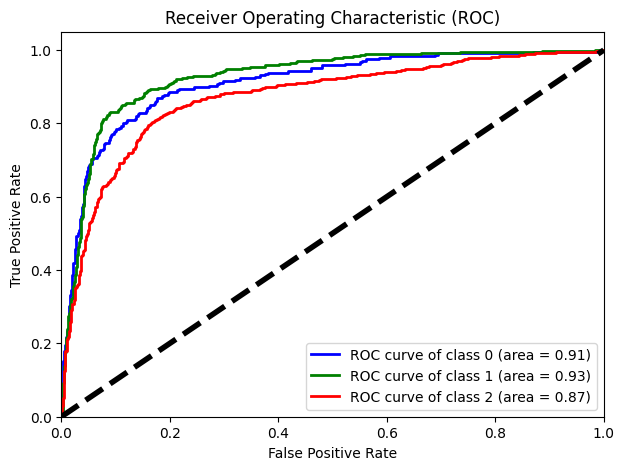

None


In [94]:
print(plot_roc_curve_multiclass(lgb_classifier, X_test_scaled, y_test, n_classes=3))

## XGBoost

In [95]:
#def xgb_evaluate(max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree):
#    model = XGBClassifier(
#        objective='multi:softprob',
#        eval_metric='mlogloss',
#        max_depth=int(max_depth),
#       learning_rate=learning_rate,
#        n_estimators=int(n_estimators),
#        min_child_weight=min_child_weight,
#        subsample=subsample,
#        colsample_bytree=colsample_bytree,
#        random_state=42,
#        use_label_encoder=False)
#
#    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#    results = []
#    for train_idx, val_idx in cv.split(X_train_scaled, y_train_resampled):
#        X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
#        y_train_fold, y_val_fold = y_train_resampled[train_idx], y_train_resampled[val_idx]
#        model.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)], verbose=False)
#        y_pred_fold = model.predict(X_val_fold)
#        results.append(accuracy_score(y_val_fold, y_pred_fold))
#    return np.mean(results)

#pbounds = {
#    'max_depth': (3, 10),
#    'learning_rate': (0.01, 0.3),
#    'n_estimators': (100, 300),
#    'min_child_weight': (1, 10),
#    'subsample': (0.6, 1.0),
#    'colsample_bytree': (0.6, 1.0)
#}

# 使用 Bayesian Optimization 進行參數調整
#optimizer = BayesianOptimization(
#    f=xgb_evaluate,
#    pbounds=pbounds,
#    random_state=42,
#    verbose=2
#)

#optimizer.maximize(init_points=5, n_iter=5)

In [97]:
best_params = {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 10, 'min_child_weight': 6.569, 'n_estimators': 2000, 'subsample': 0.6}

best_model_xgb = XGBClassifier(objective='multi:softprob', eval_metric='mlogloss', random_state=42, use_label_encoder=False, **best_params)

best_model_xgb.fit(X_train_scaled, y_train_resampled)

y_pred_xgb = best_model_xgb.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Test accuracy: ", accuracy)

Test accuracy:  0.80083857442348


In [98]:
print(calculate_results(y_test, y_pred_xgb))

{'accuracy': '80.08%', 'precision': '80.03%', 'recall': '80.08%', 'f1_score': '80.02%'}


Log Loss: 0.8900625367497432


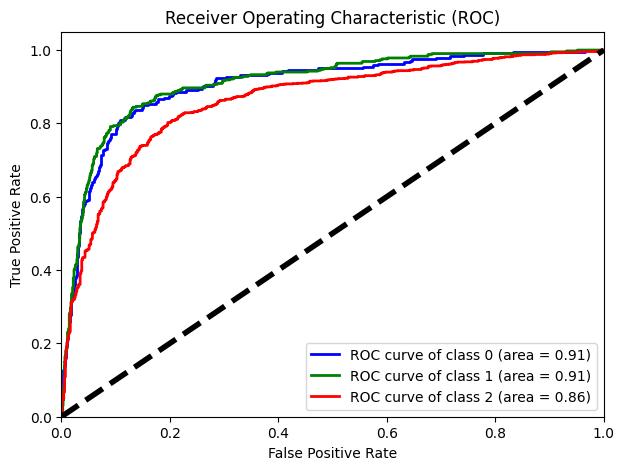

None


In [99]:
print(plot_roc_curve_multiclass(best_model_xgb, X_test_scaled, y_test, n_classes=3))

## RandomForest

In [ ]:
#pbounds = {
#    'n_estimators': (100, 2000),
#    'max_depth': (10, 50),
#    'min_samples_split': (2, 10),
#    'min_samples_leaf': (1, 10),
#    'max_features': (0.1, 0.999)}
#

#def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
#    n_estimators = int(n_estimators)
#    max_depth = int(max_depth)
#    min_samples_split = int(min_samples_split)
#    min_samples_leaf = int(min_samples_leaf)

#    rf = RandomForestClassifier(
#        n_estimators=n_estimators,
#        max_depth=max_depth,
#        min_samples_split=min_samples_split,
#        min_samples_leaf=min_samples_leaf,
#        max_features=max_features,
#        bootstrap=True,
#        random_state=42,
#        n_jobs=-1)
#

    # 使用交叉驗證計算模型的平均準確率
#    return np.mean(cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy'))

#
#optimizer = BayesianOptimization(
#    f=rf_cv,
#    pbounds=pbounds,
#    random_state=42)
#

#
#optimizer.maximize(
#    init_points=10,
#    n_iter=30)

#
#print("Best Parameters:", optimizer.max)

In [100]:
# Use the best parameters to train model
best_params = {
    'max_depth': 19,
    'max_features': 0.768,
    'min_samples_leaf': 2,
    'min_samples_split': 5,
    'n_estimators': 272
}


best_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    bootstrap=True,
    random_state=42,
    n_jobs=-1)

best_rf_model.fit(X_train_scaled, y_train_resampled)

y_pred_rf = best_rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.8045


In [101]:
print(calculate_results(y_test, y_pred_rf))

{'accuracy': '80.45%', 'precision': '81.66%', 'recall': '80.45%', 'f1_score': '80.86%'}


Log Loss: 0.5329199633046268


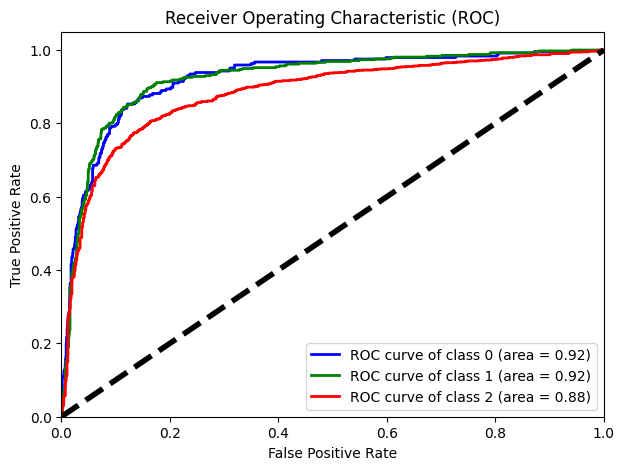

None


In [102]:
print(plot_roc_curve_multiclass(best_rf_model, X_test_scaled, y_test, n_classes=3))